#### Introduction: 

Calculating a suite of classification model performance metrics via Python code functions that we create and then comparing our results to those of pre-built Python functions that automatically calculate those same metrics. We will also be creating graphical output via Python code that can be used to evaluate the performance of classification models.

Goal - Understanding Classification Model Performance Metrics
Dataset - The data set for this work is comprised of approximately 180 labeled binary observations. The classifications are either ‘0’ or ‘1’. 
1. class: the actual classification for the observation
2. scored.class: the predicted classification for the observation (can only be ‘0’ or ‘1’; identified by
   comparing the classification model’s probability score (i.e., the likelihood that the correct classification
   for an observation is a ‘1’) for the observation against a 0.50 threshold))
3. scored.probability: the classification model’s probability score (i.e., the likelihood that the correct
   classification for an observation is a ‘1’) for the observation

Steps:
1. Import dataset
2. Use Pandas’ crosstab() function to calculate the contents of a confusion matrix for the data
3. Extract the individual confusion matrix values from the output of crosstab()
4. Define Python function for accuracy, precision, sensitivity, specificity, F1 Score and function to plot a ROC curve and also calculate AUC.
5. Compare the output of your functions against the output of the pre-built functions available within the scikit-learn library.

In [1]:
# load the pandas library
import pandas as pd
import numpy as np
# importing dataset from github.
filename = "https://raw.githubusercontent.com/getfitwithapurv/datascience/main/M5_Data%20(1).csv"
df = pd.read_csv(filename)
df.head()

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491


In [2]:
df.info() # checking datatype and null values of data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pregnant            181 non-null    int64  
 1   glucose             181 non-null    int64  
 2   diastolic           181 non-null    int64  
 3   skinfold            181 non-null    int64  
 4   insulin             181 non-null    int64  
 5   bmi                 181 non-null    float64
 6   pedigree            181 non-null    float64
 7   age                 181 non-null    int64  
 8   class               181 non-null    int64  
 9   scored.class        181 non-null    int64  
 10  scored.probability  181 non-null    float64
dtypes: float64(3), int64(8)
memory usage: 15.7 KB


In [3]:
# Using Pandas’ crosstab() function to calculate the contents of a confusion matrix for the data
cm1 = pd.crosstab(df['class'],df['scored.class'],rownames=['class'], colnames=['scored.class']) 
cm1 

scored.class,0,1
class,,
0,119,5
1,30,27


the rows represent the actual classification and the columns represent the predicted classification

In [4]:
df.value_counts('class')  # calculate the contents of a confusion matrix

class
0    124
1     57
dtype: int64

In [5]:
df.value_counts('scored.class') # calculate the contents of a confusion matrix for the data

scored.class
0    149
1     32
dtype: int64

Observing the value_counts(), we see that the rows and columns in the crosstab() output sum to the respective value_counts(). 

In [7]:
# Now extracting the individual confusion matrix values i.e. (True Positive, False Positive,
#True Negative, False Negative) from the output of crosstab()
tp= []  #true positive
tn =[] #true negative
fp =[] #false positive
fn =[] #false negative
tp = cm1[1][1]
tn = cm1[0][0]
fp = cm1[0][1]
fn = cm1[1][0]

In [8]:
print(tp,tn,fp,fn)

27 119 30 5


#### Defining Python function for accuracy, precision, sensitivity, specificity, F1 Score and function to plot a ROC curve and also calculate AUC.

In [9]:
#Accuracy
def acc(x1,x2):
    cm = pd.crosstab(x1,x2,rownames=['x1'], colnames=['x2'])
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    print(f'Accuracy is {accuracy}')

In [10]:
#Precision
def prec(x1,x2):
    cm = pd.crosstab(x1,x2,rownames=['x1'], colnames=['x2'])
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    precision = (tp)/(tp+fp)
    print(f'Precision is {precision}')

In [11]:
#Sensitivity
def sens(x1,x2):
    cm = pd.crosstab(x1,x2,rownames=['x1'], colnames=['x2'])
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    sensitivity = (tp)/(tp+fn)
    print(f'Sensitivity is {sensitivity}')

In [12]:
#Specificity
def speci(x1,x2):
    cm = pd.crosstab(x1,x2,rownames=['x1'], colnames=['x2'])
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    specificity = (tn)/(tn+fp)
    print(f'Specificity is {specificity}')

In [13]:
#F1 Score
def F1S(x1,x2):
    cm = pd.crosstab(x1,x2,rownames=['x1'], colnames=['x2'])
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    sensitivity = (tp)/(tp+fn)
    recall = sensitivity
    precision = (tp)/(tp+fp)
    F1_score = 2*((recall*precision)/(recall+precision))
    print(f'F1 Score is {F1_score}')

Applying the Python functions you’ve created to the relevant columns of the provided data set to produce the classification metrics.

In [14]:
acc(df['class'],df['scored.class'])
prec(df['class'],df['scored.class'])
sens(df['class'],df['scored.class'])
speci(df['class'],df['scored.class'])
F1S(df['class'],df['scored.class'])

Accuracy is 0.8066298342541437
Precision is 0.47368421052631576
Sensitivity is 0.84375
Specificity is 0.7986577181208053
F1 Score is 0.6067415730337079


In [24]:
import matplotlib.pyplot as plt

User defined function for ROC 

In [27]:
def tp_fp(x1,x2):
    cm = pd.crosstab(x1,x2,rownames=['x1'], colnames=['x2'])
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tpr = (tp / (tp + fn)) #tpr is true positive rate 
    fpr = (fp / (fp + tn)) #fpr is false positive rate
    # Plot ROC curves
    plt.plot(fpr,tpr)
    plt.title("Between actual and predicted classifications")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

####  Output of the pre-built functions available within the scikit-learn library

In [34]:
from sklearn import metrics #importing required library

In [35]:
confusion_matrix = metrics.confusion_matrix(df['class'],df['scored.class'])
confusion_matrix

array([[119,   5],
       [ 30,  27]])

In [36]:
#pre built function
Accuracy1 = metrics.accuracy_score(df['class'],df['scored.class'])
Precision1 = metrics.precision_score(df['class'],df['scored.class'])
Sensitivity_recall1 = metrics.recall_score(df['class'],df['scored.class'])
Specificity1 = metrics.recall_score(df['class'],df['scored.class'], pos_label=0)
F1_score1 = metrics.f1_score(df['class'],df['scored.class'])
print( f'Accuracy is {Accuracy1}')
print(f'Precision is {Precision1}')
print(f'Sensitivity is {Sensitivity_recall1}')
print(f'Specificity is {Specificity1}')
print(f'F1 Score is {F1_score1}')

Accuracy is 0.8066298342541437
Precision is 0.84375
Sensitivity is 0.47368421052631576
Specificity is 0.9596774193548387
F1 Score is 0.6067415730337079


In [37]:
X = metrics.classification_report(df['class'],df['scored.class'])
print(X)

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       124
           1       0.84      0.47      0.61        57

    accuracy                           0.81       181
   macro avg       0.82      0.72      0.74       181
weighted avg       0.81      0.81      0.79       181



In [38]:
from sklearn.metrics import roc_curve, plot_roc_curve

In [39]:
fpr, tpr, _ = metrics.roc_curve(df['class'],df['scored.class']) 

In [40]:
fpr1, tpr1, _ = metrics.roc_curve(df['class'],df['scored.probability'])

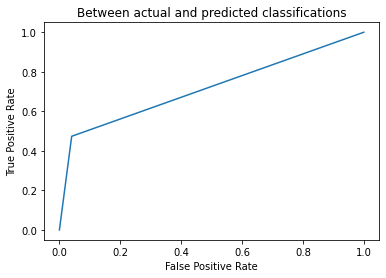

In [41]:
#plotting receiver operating characteristic (ROC) curve
plt.plot(fpr,tpr)
plt.title("Between actual and predicted classifications")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

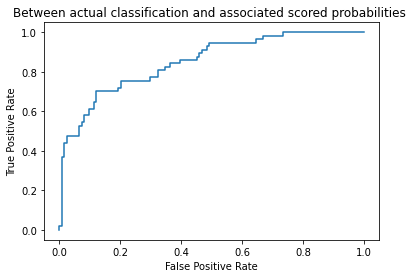

In [42]:
#plotting receiver operating characteristic (ROC) curve
plt.plot(fpr1,tpr1)
plt.title("Between actual classification and associated scored probabilities ")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [43]:
#Calculating area under the (ROC) curve value
auc1 = metrics.auc(fpr, tpr)
print(f'AUC value for class and scored class is {auc1}')

AUC value for class and scored class is 0.7166808149405772


In [44]:
#Calculating area under the (ROC) curve value
auc2 = metrics.auc(fpr1, tpr1)
print(f'AUC value for class and scored probability is {auc2}')

AUC value for class and scored probability is 0.8503112620260327


#### Conclusion:

- After observing the outputs of both the pre-built as well as user defined functions it is concluded that the pre-built functions in  scikit-learn library has exact same results to those of the user defined functions that we have created. 
- Result for ROC plot and calculate AUC is also same for both pre-built and user defined functions.

References: 
1. https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/
2. https://towardsdatascience.com/confusion-matrix-and-class-statistics-68b79f4f510b
3. https://towardsdatascience.com/understanding-the-roc-curve-and-auc-dd4f9a192ecb